# **Aprendizado de Máquina Não Supervisionado - K Means**

In [89]:
import numpy as np
import pandas as pd

In [90]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [91]:
df = pd.read_csv('./survey_results_salary_log.csv', sep=',', encoding='utf-8')
df.head()

,Unnamed: 0.1,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,GrossWage,WageFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessionalUse,OpSysPersonalUse,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,SOVisitFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,YearlyWageInDollar,YearsCodeNumber,YearsCodeProNumber
0,0,2,3,part_dev,employed_full_time,hybrid,hobby,master,books;someone;other_online_resources,technical_documentation;blogs;programming_game...,NaN,14,5,data_scientist_or_machine_learning_specialist;...,20 to 99 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,multiple_day,25-34 years old,man,no,bisexual,white,none,emotional;anxiety,NaN,NaN,NaN,NaN,NaN,10.601747,14.0,5.0
1,1,3,4,dev,employed_full_time,remote,i_dont_code_outside_of_work,bachelor,books;school,NaN,NaN,20,17,developer_full_stack,100 to 499 employees,israel,ILS,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,Very unfavorable,daily,35-44 years old,man,no,heterosexual,white,none,none,NaN,NaN,NaN,NaN,NaN,12.279472,20.0,17.0
2,2,8,9,dev,employed_full_time,hybrid,i_dont_code_outside_of_work,master,job;bootcamp,NaN,NaN,6,6,developer_back_end,I don’t know,netherlands,EUR,46000.0,Yearly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emacs;Notepad++,Emacs;Notepad++,Windows,Windows,Git,Command-line;Dedicated version control GUI app...,Confluence;Jira Work Management,Confluence;Jira Work Management,Microsoft Teams,Microsoft Teams,Very unfavorable,weekly,25-34 years old,woman,no,other,european,other,other,independent_contributor,6.0,15-30 minutes a day,Over 120 minutes a day,innersource_initiative;devops_function;microse...,10.800718,6.0,6.0
3,3,10,11,dev,employed_full_time,hybrid,i_dont_code_outside_of_work,bachelor,books;someone;other_online_resources,technical_documentation;blogs;written_tutorial...,NaN,5,2,developer_full_stack;developer_back_end,100 to 499 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,48000.0,Yearly,Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL,C#;Go;JavaScript,Microsoft SQL Server,Microsoft SQL Server,AWS;Microsoft Azure,Microsoft Azure,ASP.NET;ASP.NET Core ;Vue.js,ASP.NET;ASP.NET Core ;Blazor,.NET,NaN,Docker;npm;Terraform,Docker;Terraform,Rider;Visual Studio;Visual Studio Code,Rider;Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),Linux-based,Git,Code editor;Command-line,Confluence,NaN,Google Chat;Microsoft Teams;Slack;Zoom,Google Chat;Slack,Unfavorable,weekly,18-24 years old,man,no,heterosexual,european,none,none,NaN,NaN,NaN,NaN,NaN,11.007203,5.0,2.0
4,4,11,12,part_dev,employed_full_time;independent,remote,hobby;open_source;freelance,bachelor,other_online_resources,technical_documentation;blogs;written_tuto

In [92]:
df.shape

(35720, 58)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

No arquivo `normalidade.ipynb`.

## **PRÉ-PROCESSAMENTO**

In [93]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,GrossWage,WageFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessionalUse,OpSysPersonalUse,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,SOVisitFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,YearlyWageInDollar,YearsCodeNumber,YearsCodeProNumber
0,0,2,3,part_dev,employed_full_time,hybrid,hobby,master,books;someone;other_online_resources,technical_documentation;blogs;programming_game...,NaN,14,5,data_scientist_or_machine_learning_specialist;...,20 to 99 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,multiple_day,25-34 years old,man,no,bisexual,white,none,emotional;anxiety,NaN,NaN,NaN,NaN,NaN,10.601747,14.0,5.0
1,1,3,4,dev,employed_full_time,remote,i_dont_code_outside_of_work,bachelor,books;school,NaN,NaN,20,17,developer_full_stack,100 to 499 employees,israel,ILS,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,Very unfavorable,daily,35-44 years old,man,no,heterosexual,white,none,none,NaN,NaN,NaN,NaN,NaN,12.279472,20.0,17.0
2,2,8,9,dev,employed_full_time,hybrid,i_dont_code_outside_of_work,master,job;bootcamp,NaN,NaN,6,6,developer_back_end,I don’t know,netherlands,EUR,46000.0,Yearly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emacs;Notepad++,Emacs;Notepad++,Windows,Windows,Git,Command-line;Dedicated version control GUI app...,Confluence;Jira Work Management,Confluence;Jira Work Management,Microsoft Teams,Microsoft Teams,Very unfavorable,weekly,25-34 years old,woman,no,other,european,other,other,independent_contributor,6.0,15-30 minutes a day,Over 120 minutes a day,innersource_initiative;devops_function;microse...,10.800718,6.0,6.0
3,3,10,11,dev,employed_full_time,hybrid,i_dont_code_outside_of_work,bachelor,books;someone;other_online_resources,technical_documentation;blogs;written_tutorial...,NaN,5,2,developer_full_stack;developer_back_end,100 to 499 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,48000.0,Yearly,Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL,C#;Go;JavaScript,Microsoft SQL Server,Microsoft SQL Server,AWS;Microsoft Azure,Microsoft Azure,ASP.NET;ASP.NET Core ;Vue.js,ASP.NET;ASP.NET Core ;Blazor,.NET,NaN,Docker;npm;Terraform,Docker;Terraform,Rider;Visual Studio;Visual Studio Code,Rider;Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),Linux-based,Git,Code editor;Command-line,Confluence,NaN,Google Chat;Microsoft Teams;Slack;Zoom,Google Chat;Slack,Unfavorable,weekly,18-24 years old,man,no,heterosexual,european,none,none,NaN,NaN,NaN,NaN,NaN,11.007203,5.0,2.0
4,4,11,12,part_dev,employed_full_time;independent,remote,hobby;open_source;freelance,bachelor,other_online_resources,technical_documentation;blogs;written_tuto

### Selecionar as colunas que vamos utilizar

In [94]:
df2 = df[['EdLevel', 'Country', 'Currency', 'YearsCodeNumber', 'YearsCodeProNumber', 'YearlyWageInDollar']].copy()

In [95]:
df2.head()

,EdLevel,Country,Currency,YearsCodeNumber,YearsCodeProNumber,YearlyWageInDollar
0,master,united_kingdom_of_great_britain_and_northern_i...,GBP,14.0,5.0,10.601747
1,bachelor,israel,ILS,20.0,17.0,12.279472
2,master,netherlands,EUR,6.0,6.0,10.800718
3,bachelor,united_kingdom_of_great_britain_and_northern_i...,GBP,5.0,2.0,11.007203
4,bachelor,united_states_of_america,USD,12.0,10.0,12.177673


In [96]:
df_num = df2.copy()

### Transformar variáveis categóricas em números

#### Education Level

In [97]:
df_num['EdLevelNumber'] = pd.factorize(df2['EdLevel'])[0]
df_num.head(20)

,EdLevel,Country,Currency,YearsCodeNumber,YearsCodeProNumber,YearlyWageInDollar,EdLevelNumber
0,master,united_kingdom_of_great_britain_and_northern_i...,GBP,14.0,5.0,10.601747,0
1,bachelor,israel,ILS,20.0,17.0,12.279472,1
2,master,netherlands,EUR,6.0,6.0,10.800718,0
3,bachelor,united_kingdom_of_great_britain_and_northern_i...,GBP,5.0,2.0,11.007203,1
4,bachelor,united_states_of_america,USD,12.0,10.0,12.177673,1
5,bachelor,united_states_of_america,USD,12.0,5.0,11.082143,1
6,master,united_states_of_america,USD,11.0,5.0,11.608236,0
7,bachelor,czech_republic,CZK,7.0,4.0,9.863915,1
8,master,austria,EUR,13.0,10.0,12.219102,0
9,high_school,austria,EUR,36.0,22.0,10.843339,2


In [98]:
df_num.drop(['EdLevel'], axis='columns', inplace=True)
df_num

,Country,Currency,YearsCodeNumber,YearsCodeProNumber,YearlyWageInDollar,EdLevelNumber
0,united_kingdom_of_great_britain_and_northern_i...,GBP,14.0,5.0,10.601747,0
1,israel,ILS,20.0,17.0,12.279472,1
2,netherlands,EUR,6.0,6.0,10.800718,0
3,united_kingdom_of_great_britain_and_northern_i...,GBP,5.0,2.0,11.007203,1
4,united_states_of_america,USD,12.0,10.0,12.177673,1
...,...,...,...,...,...,...
35715,united_states_of_america,USD,21.0,16.0,11.652687,1
35716,nigeria,NGN,4.0,3.0,10.963359,1
35717,united_states_of_america,USD,5.0,1.0,11.156251,1
35718,spain,EUR,6.0,2.0,10.468574,1


#### Country

In [99]:
df_num['CountryNumber'] = pd.factorize(df_num['Country'])[0]
df_num.head(20)

,Country,Currency,YearsCodeNumber,YearsCodeProNumber,YearlyWageInDollar,EdLevelNumber,CountryNumber
0,united_kingdom_of_great_britain_and_northern_i...,GBP,14.0,5.0,10.601747,0,0
1,israel,ILS,20.0,17.0,12.279472,1,1
2,netherlands,EUR,6.0,6.0,10.800718,0,2
3,united_kingdom_of_great_britain_and_northern_i...,GBP,5.0,2.0,11.007203,1,0
4,united_states_of_america,USD,12.0,10.0,12.177673,1,3
5,united_states_of_america,USD,12.0,5.0,11.082143,1,3
6,united_states_of_america,USD,11.0,5.0,11.608236,0,3
7,czech_republic,CZK,7.0,4.0,9.863915,1,4
8,austria,EUR,13.0,10.0,12.219102,0,5
9,austria,EUR,36.0,22.0,10.843339,2,5


In [100]:
df_num.drop(['Country'], axis='columns', inplace=True)
df_num

,Currency,YearsCodeNumber,YearsCodeProNumber,YearlyWageInDollar,EdLevelNumber,CountryNumber
0,GBP,14.0,5.0,10.601747,0,0
1,ILS,20.0,17.0,12.279472,1,1
2,EUR,6.0,6.0,10.800718,0,2
3,GBP,5.0,2.0,11.007203,1,0
4,USD,12.0,10.0,12.177673,1,3
...,...,...,...,...,...,...
35715,USD,21.0,16.0,11.652687,1,3
35716,NGN,4.0,3.0,10.963359,1,86
35717,USD,5.0,1.0,11.156251,1,3
35718,EUR,6.0,2.0,10.468574,1,17


#### Currency

In [101]:
df_num['CurrencyNumber'] = pd.factorize(df_num['Currency'])[0]
df_num.head(20)

,Currency,YearsCodeNumber,YearsCodeProNumber,YearlyWageInDollar,EdLevelNumber,CountryNumber,CurrencyNumber
0,GBP,14.0,5.0,10.601747,0,0,0
1,ILS,20.0,17.0,12.279472,1,1,1
2,EUR,6.0,6.0,10.800718,0,2,2
3,GBP,5.0,2.0,11.007203,1,0,0
4,USD,12.0,10.0,12.177673,1,3,3
5,USD,12.0,5.0,11.082143,1,3,3
6,USD,11.0,5.0,11.608236,0,3,3
7,CZK,7.0,4.0,9.863915,1,4,4
8,EUR,13.0,10.0,12.219102,0,5,2
9,EUR,36.0,22.0,10.843339,2,5,2


In [102]:
df_num.drop(['Currency'], axis='columns', inplace=True)
df_num

,YearsCodeNumber,YearsCodeProNumber,YearlyWageInDollar,EdLevelNumber,CountryNumber,CurrencyNumber
0,14.0,5.0,10.601747,0,0,0
1,20.0,17.0,12.279472,1,1,1
2,6.0,6.0,10.800718,0,2,2
3,5.0,2.0,11.007203,1,0,0
4,12.0,10.0,12.177673,1,3,3
...,...,...,...,...,...,...
35715,21.0,16.0,11.652687,1,3,3
35716,4.0,3.0,10.963359,1,86,63
35717,5.0,1.0,11.156251,1,3,3
35718,6.0,2.0,10.468574,1,17,2


In [103]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35720 entries, 0 to 35719
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearsCodeNumber     35720 non-null  float64
 1   YearsCodeProNumber  35720 non-null  float64
 2   YearlyWageInDollar  35720 non-null  float64
 3   EdLevelNumber       35720 non-null  int64  
 4   CountryNumber       35720 non-null  int64  
 5   CurrencyNumber      35720 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


### Escalonamento

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
escala = StandardScaler()
df_num_esc = escala.fit_transform(df_num)

In [106]:
df_num_esc

array([[-0.06861112, -0.60254491, -0.32070568, -0.85156609, -0.82534571,
        -0.66193035],
       [ 0.5677371 ,  0.86853667,  1.09806972, -0.35358075, -0.78350071,
        -0.59711972],
       [-0.91707541, -0.47995478, -0.15244489, -0.85156609, -0.74165571,
        -0.53230908],
       ...,
       [-1.02313345, -1.09290544,  0.14821288, -0.35358075, -0.69981072,
        -0.46749844],
       [-0.91707541, -0.9703153 , -0.43332363, -0.35358075, -0.11398076,
        -0.53230908],
       [-0.49284326, -0.84772517,  0.2108757 , -0.85156609, -0.82534571,
        -0.66193035]])

## **K Means com todos os atributos**

In [107]:
df_num_esc.shape

(35720, 6)

### Elbow Method

In [108]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_num_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

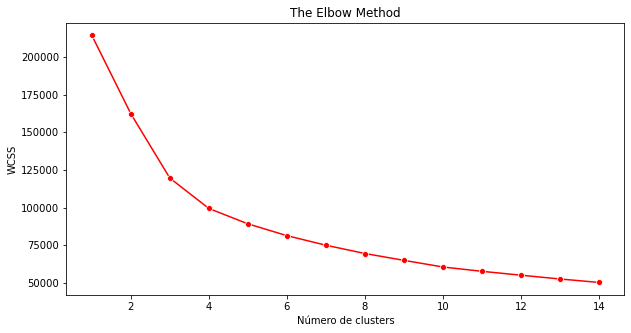

In [110]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

### Agrupamento

In [111]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)

In [112]:
kmeans2 = kmeans.fit(df_num_esc)

In [113]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[-0.52627854, -0.54068165,  0.2548637 , -0.48368539, -0.45613115,
        -0.40654545],
       [-0.66989883, -0.62216106, -1.14937849, -0.27328313,  0.82490119,
         0.42828327],
       [ 0.71645474,  0.65885836,  0.4753832 , -0.51999517, -0.29963451,
        -0.31079729],
       [-0.15866495, -0.18399548,  0.11300378,  1.8439743 , -0.24429123,
        -0.28509489],
       [ 2.14965573,  2.24029125,  0.52922663,  0.40241496, -0.34367109,
        -0.28181528],
       [-0.37040372, -0.31846832, -0.90471676, -0.02902521,  2.24850124,
         2.97242995]])

In [114]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[ 9.68474549,  5.5046349 , 11.28236686,  0.73873801,  8.82338592,
         3.94047813],
       [ 8.33057851,  4.83998593,  9.62182747,  1.16124494, 39.43713733,
        16.82152277],
       [21.40222883, 15.28959881, 11.54313479,  0.66582467, 12.56329866,
         5.41783061],
       [13.15090047,  8.41421801, 11.11461518,  5.412891  , 13.88587678,
         5.81440758],
       [34.91559413, 28.18976354, 11.60680552,  2.51810835, 11.51092487,
         5.86501048],
       [11.15445793,  7.31728757,  9.91114397,  1.65173713, 73.45793219,
        56.07660109]])

In [115]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([0, 2, 0, ..., 0, 0, 0])

In [116]:
classificacao2[199]

4

In [117]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,0
1,2
2,0
3,0
4,0
...,...
35715,2
35716,5
35717,0
35718,0


In [118]:
df4 = pd.concat([df, agrupamento2],axis=1)
df4

,Unnamed: 0.1,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,GrossWage,WageFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessionalUse,OpSysPersonalUse,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,SOVisitFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,YearlyWageInDollar,YearsCodeNumber,YearsCodeProNumber,Grupo
0,0,2,3,part_dev,employed_full_time,hybrid,hobby,master,books;someone;other_online_resources,technical_documentation;blogs;programming_game...,NaN,14,5,data_scientist_or_machine_learning_specialist;...,20 to 99 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,multiple_day,25-34 years old,man,no,bisexual,white,none,emotional;anxiety,NaN,NaN,NaN,NaN,NaN,10.601747,14.0,5.0,0
1,1,3,4,dev,employed_full_time,remote,i_dont_code_outside_of_work,bachelor,books;school,NaN,NaN,20,17,developer_full_stack,100 to 499 employees,israel,ILS,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,Very unfavorable,daily,35-44 years old,man,no,heterosexual,white,none,none,NaN,NaN,NaN,NaN,NaN,12.279472,20.0,17.0,2
2,2,8,9,dev,employed_full_time,hybrid,i_dont_code_outside_of_work,master,job;bootcamp,NaN,NaN,6,6,developer_back_end,I don’t know,netherlands,EUR,46000.0,Yearly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emacs;Notepad++,Emacs;Notepad++,Windows,Windows,Git,Command-line;Dedicated version control GUI app...,Confluence;Jira Work Management,Confluence;Jira Work Management,Microsoft Teams,Microsoft Teams,Very unfavorable,weekly,25-34 years old,woman,no,other,european,other,other,independent_contributor,6.0,15-30 minutes a day,Over 120 minutes a day,innersource_initiative;devops_function;microse...,10.800718,6.0,6.0,0
3,3,10,11,dev,employed_full_time,hybrid,i_dont_code_outside_of_work,bachelor,books;someone;other_online_resources,technical_documentation;blogs;written_tutorial...,NaN,5,2,developer_full_stack;developer_back_end,100 to 499 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,48000.0,Yearly,Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL,C#;Go;JavaScript,Microsoft SQL Server,Microsoft SQL Server,AWS;Microsoft Azure,Microsoft Azure,ASP.NET;ASP.NET Core ;Vue.js,ASP.NET;ASP.NET Core ;Blazor,.NET,NaN,Docker;npm;Terraform,Docker;Terraform,Rider;Visual Studio;Visual Studio Code,Rider;Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),Linux-based,Git,Code editor;Command-line,Confluence,NaN,Google Chat;Microsoft Teams;Slack;Zoom,Google Chat;Slack,Unfavorable,weekly,18-24 years old,man,no,heterosexual,european,none,none,NaN,NaN,NaN,NaN,NaN,11.007203,5.0,2.0,0
4,4,11,12,part_dev,employed_full_time;independent,remote,hobby;open_source;freelance,bachelor,other_online_resources,technical_documentation;blog

## **K Means com PCA**

In [119]:
df_num_esc

array([[-0.06861112, -0.60254491, -0.32070568, -0.85156609, -0.82534571,
        -0.66193035],
       [ 0.5677371 ,  0.86853667,  1.09806972, -0.35358075, -0.78350071,
        -0.59711972],
       [-0.91707541, -0.47995478, -0.15244489, -0.85156609, -0.74165571,
        -0.53230908],
       ...,
       [-1.02313345, -1.09290544,  0.14821288, -0.35358075, -0.69981072,
        -0.46749844],
       [-0.91707541, -0.9703153 , -0.43332363, -0.35358075, -0.11398076,
        -0.53230908],
       [-0.49284326, -0.84772517,  0.2108757 , -0.85156609, -0.82534571,
        -0.66193035]])

In [120]:
df_num_esc.shape

(35720, 6)

### Componentes principais

In [121]:
from sklearn.decomposition import PCA

In [122]:
pca = PCA(n_components = 2)

In [123]:
df_num_pca = pca.fit_transform(df_num_esc)

In [124]:
df_num_pca

array([[-0.15647934, -1.11424915],
       [-1.72719628, -0.12912829],
       [ 0.20538064, -1.39307842],
       ...,
       [ 0.43056204, -1.68773571],
       [ 0.80460722, -1.24635436],
       [-0.07493169, -1.52288672]])

In [125]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.40615681, 0.26013596])

In [126]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.6662927691581642

### Elbow Method

In [127]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_num_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

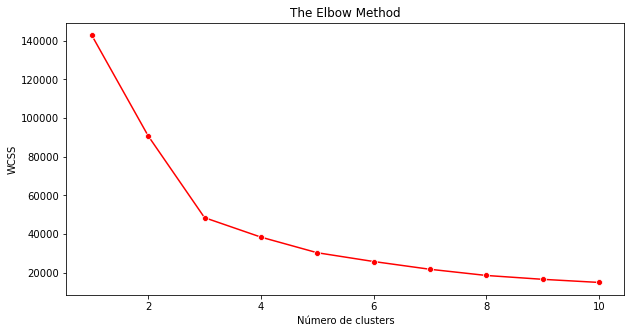

In [129]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

### Agrupamento

In [130]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [131]:
kmeans_fit = kmeans.fit(df_num_pca)

In [132]:
# Coordenadas dos Centróides
centroides = kmeans_fit.cluster_centers_
centroides

array([[ 2.54682156,  1.54363316],
       [ 0.44914063, -0.901149  ],
       [-2.32069088,  1.68227581],
       [-0.86543142, -0.07068055]])

In [133]:
# Classificação dos dados
classificacao = kmeans_fit.labels_
classificacao

array([1, 3, 1, ..., 1, 1, 1])

In [134]:
import plotly.express as px
import plotly.graph_objects as go

In [135]:
graf1 = px.scatter(x = df_num_pca[:,0], y = df_num_pca[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [136]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,1
1,3
2,1
3,1
4,3
...,...
35715,3
35716,0
35717,1
35718,1


In [137]:
df_pca = pd.concat([df, agrupamento],axis=1)
df_pca

,Unnamed: 0.1,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,GrossWage,WageFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessionalUse,OpSysPersonalUse,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,SOVisitFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,YearlyWageInDollar,YearsCodeNumber,YearsCodeProNumber,Grupo
0,0,2,3,part_dev,employed_full_time,hybrid,hobby,master,books;someone;other_online_resources,technical_documentation;blogs;programming_game...,NaN,14,5,data_scientist_or_machine_learning_specialist;...,20 to 99 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,multiple_day,25-34 years old,man,no,bisexual,white,none,emotional;anxiety,NaN,NaN,NaN,NaN,NaN,10.601747,14.0,5.0,1
1,1,3,4,dev,employed_full_time,remote,i_dont_code_outside_of_work,bachelor,books;school,NaN,NaN,20,17,developer_full_stack,100 to 499 employees,israel,ILS,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,Very unfavorable,daily,35-44 years old,man,no,heterosexual,white,none,none,NaN,NaN,NaN,NaN,NaN,12.279472,20.0,17.0,3
2,2,8,9,dev,employed_full_time,hybrid,i_dont_code_outside_of_work,master,job;bootcamp,NaN,NaN,6,6,developer_back_end,I don’t know,netherlands,EUR,46000.0,Yearly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emacs;Notepad++,Emacs;Notepad++,Windows,Windows,Git,Command-line;Dedicated version control GUI app...,Confluence;Jira Work Management,Confluence;Jira Work Management,Microsoft Teams,Microsoft Teams,Very unfavorable,weekly,25-34 years old,woman,no,other,european,other,other,independent_contributor,6.0,15-30 minutes a day,Over 120 minutes a day,innersource_initiative;devops_function;microse...,10.800718,6.0,6.0,1
3,3,10,11,dev,employed_full_time,hybrid,i_dont_code_outside_of_work,bachelor,books;someone;other_online_resources,technical_documentation;blogs;written_tutorial...,NaN,5,2,developer_full_stack;developer_back_end,100 to 499 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,48000.0,Yearly,Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL,C#;Go;JavaScript,Microsoft SQL Server,Microsoft SQL Server,AWS;Microsoft Azure,Microsoft Azure,ASP.NET;ASP.NET Core ;Vue.js,ASP.NET;ASP.NET Core ;Blazor,.NET,NaN,Docker;npm;Terraform,Docker;Terraform,Rider;Visual Studio;Visual Studio Code,Rider;Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),Linux-based,Git,Code editor;Command-line,Confluence,NaN,Google Chat;Microsoft Teams;Slack;Zoom,Google Chat;Slack,Unfavorable,weekly,18-24 years old,man,no,heterosexual,european,none,none,NaN,NaN,NaN,NaN,NaN,11.007203,5.0,2.0,1
4,4,11,12,part_dev,employed_full_time;independent,remote,hobby;open_source;freelance,bachelor,other_online_resources,technical_documentation;blog